In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mpl_logoplot

In [2]:
np.random.seed(42)

seq = np.random.exponential(size=(16, 4))
seq = seq / np.sum(seq, axis=1, keepdims=True)
seq = np.clip(seq, 1e-8, 1-1e-8)
entropy = -np.sum(seq * np.log(seq), axis=1)

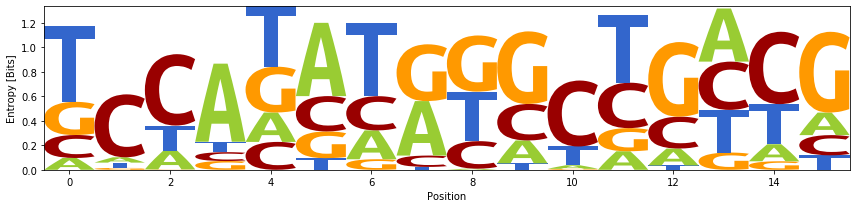

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)

mpl_logoplot.logoplot(ax, seq, 'ATGC', height=entropy, color='dna')

ax.set_xlabel('Position')
ax.set_ylabel('Entropy [Bits]')

fig.tight_layout()
#fig.savefig('Examples/DNA.png')

# Logoplots from an alignment

I'm currently testing generating logoplots from alignments:

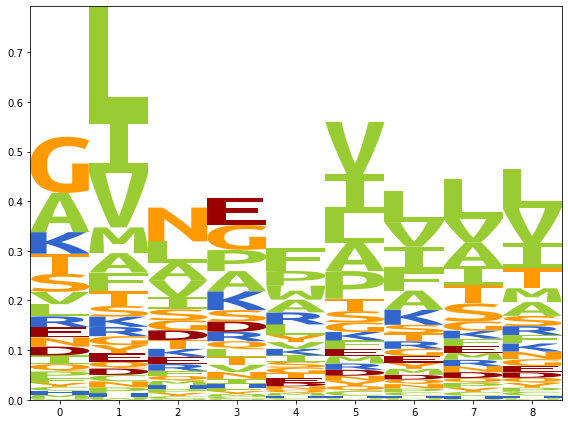

In [4]:
import mpl_logoplot
import mpl_logoplot.psfm

seqs = """ALAKAAAAM
ALAKAAAAN
ALAKAAAAR
ALAKAAAAT
ALAKAAAAV
GMNERPILT
GILGFVFTM
TLNAWVKVV
KLNEPVLLL
AVVPFIVSV""".splitlines()

alignment = mpl_logoplot.psfm.AlignmentPSFM(seqs, alphabet=mpl_logoplot.AMINO_ACIDS, clustering='hobohm', weight_on_prior=200)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

logo = alignment.shannon_logo()
mpl_logoplot.logoplot(ax, logo, alignment.alphabet, color='protein')

fig.tight_layout()
#fig.savefig('Examples/peptide.png')